In [209]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import genfromtxt
from scipy.signal import find_peaks
import sys
import os
import pandas as pd

In [210]:
#Function definitions
#Import theoretical spectra. Names follow the convention "molecule form wide functional"
#molecule='68'
#form='closed'
#functional=['pbe0','pbe0-d3']
def read_theo(mol,f,fun):
    script_dir = os.getcwd()
    filename=mol+' '+f+" wide "+fun+'.txt'
#Relative path to directory with theoretical spectra e.g. 0068_closed
    rel_path='00'+mol+'_'+f+'/'
    path=os.path.join(script_dir,rel_path)
    theo_spec=genfromtxt(path+filename, delimiter='     ',dtype=float)
    return theo_spec
#Theoretical peak detection
def theo_peaks(SF,wavenumbers_theo,heights_theo):
    #D=8
    D=2
    H=0.02
    peaks_theo, _ = find_peaks(heights_theo,height=H,threshold=T,distance=D)
    return peaks_theo
#error calculation
#Calculate errors
def calculate_MAE():
    print("Error calculation:")

    #tolerance for wavenumbers (when range jump is required)
    tol=200.0
    #tolerance for height ratio (when the exp and theoretical heights are so off that the band assignement must be wrong)
    htol=10.0
    error=[]
    j=0
    #print(range(len(y)))
    #print(range(len(y_theo)))
    assigned=[]
    assigned_theo_number=[]
    assigned_exp_number=[]
    for i in range(len(y)):
     #   print(i)
        while True:
            if y[i]<500:
                break
            if j==len(y_theo)-1:
                print("End of theoretical spectrum")
                break
   #         elif i==len(y)-1:
    #            print("End of experimental spectrum")
     #           break
            else:
                if y[i]-y_theo[j]>tol :
                    print((y[i]-y_theo[j],y[i],y_theo[j]))
                    print('error > ',tol,', skipping the predicted peak')
                    j=j+1
                if y[i]-y_theo[j]<-tol :
                    print('error > ',tol,', skipping the experimental peak')
                    break
     #           print(heights[i])
     #           print(heights_theo[j])

   #             if abs(y[i]-y_theo[j])<abs(y[i]-y_theo[j+1]):
                if abs(y[i]-y_theo[j])<abs(y[i]-y_theo[j+1]) and h_exp[i]/h_theo[j]<htol and h_theo[j]/h_exp[i]<htol:
                        error.append(y[i]-y_theo[j])
                        assigned.append([y[i],y_theo[j]])
                        assigned_theo_number.append(j)
                        assigned_exp_number.append(i) 
                        
   #                     print("IF",(y[i]-y_theo[j],y[i],y_theo[j]))
    #                    print(h_exp[i])
    #                    print(h_theo[j])
    #                    print(heights[i])
   #                     print(heights_theo[j])
                        j=j+1
                        break
                else:
                        j=j+1
      #                  print("ELSE",(y[i]-y_theo[j],y[i],y_theo[j]))
     #                   print((y[i]-y_theo[j+1],y[i],y_theo[j+1]))
     #                   print(h_exp[i])
     #                   print(h_theo[j])
#                        error.append(y[i]-y_theo[j])
#                        assigned.append([y[i],y_theo[j]])
#                print(i,j)

 #   print(assigned_theo_number)
 #   print(assigned_exp_number)
#print(heights)
#print(heights_theo)
    print("\n {} peaks were assigned. Scaling factor of {} was used for the theoretical spectrum.\n".format(len(error),SF))
  #  t=[range(len(error)),assigned[0], assigned [1],[i/SF for i in assigned[1]], [h_exp[i] for i in assigned_exp_number],[h_theo[i] for i in assigned_theo_number]]
  #  df=pd.DataFrame(assigned,[i/SF for i in assigned[1]], [h_exp[i] for i in assigned_exp_number],[h_theo[i] for i in assigned_theo_number],["Exp. waveno. "," Scaled theor. waveno.","  Theor. unscaled waveno ","   Exp. peak height "," Theor. peak height"])
    df=pd.DataFrame(assigned,columns=["Exp. waveno.","Scaled theo. waveno."])
 #   df["Theor. unscaled waveno"]=[i/SF for i in assigned[1]]
    df["Exp. peak height"]=[h_exp[i] for i in assigned_exp_number]
    df["Theo. peak height"]=[h_theo[i] for i in assigned_theo_number]
    df['Deviations']=df["Exp. waveno."]-df["Scaled theo. waveno."]
    display(df)
 #   table=tabulate(transposedT,headers= ["Exp. waveno. "," Scaled theor. waveno.","  Theor. unscaled waveno ","   Exp. peak height "," Theor. peak height"],tablefmt='simple')
 #   print(table)
   # print("   |Exp. waveno. | Scaled theor. waveno. |  Theor. unscaled waveno | cm-1|   Exp. peak height (normalized) | Theor. peak height (normalized)")
 #   k=0
#    for i in assigned:
 #       w=assigned_exp_number[k]
 #       v=assigned_theo_number[k]
 #       print(k," | ",i[0]," | ",i[1],"         | ", i[1]/SF," |    |",h_exp[w],"         | ",h_theo[v])
  #      k=k+1

    print("\n Mean absolute error: \n")
    MAE=   sum(abs(i) for i in error)/len(error)
    print("MAE = {} cm-1".format(round(MAE,2)))
    return MAE,len(error)


In [211]:
script_dir = os.getcwd()
np.set_printoptions(precision=6,threshold=sys.maxsize)

In [212]:
#set parameters
H=0.04
#H=0.05
T=0.0
D=16
#experimental resolution
res=8.0

In [213]:
#Input data parameters
# Names of theoretical spectra files follow the convention "molecule form wide functional"
molecule='68'
form='closed'
functional=["pbe0","pbe0-d3",'b3lyp', 'b3lyp-d3', 'cam-b3lyp', 'cam-b3lyp-d3','m06l','wb97-xd']
#scaling factors for given functionals
scaling_f={'pbe0':0.95, 'pbe0-d3':0.95, 'b3lyp': 0.959, 'b3lyp-d3': 0.959, 'cam-b3lyp': 0.951, 'cam-b3lyp-d3': 0.951,'m06l': 0.951, 'wb97-xd': 0.95}


In [214]:
#Read in the experimental data for the selected molecule
#Data  in two columns without headers, separated by comma
exp_spec = genfromtxt('Sheet1_68_closed_ok.csv', delimiter=',',dtype=float)
wavenumbers=exp_spec[:,0]
heights=exp_spec[:,1]/max(exp_spec[:,1])
#height - minimal height of the peak, threshold - minimal vertical distance between a peak and its neighbor, Distance - minimal distance
peaks, _ = find_peaks(heights,height=H,threshold=T,distance=D)
y=[wavenumbers[j] for j in peaks]
h_exp=[heights[j] for j in peaks]
print("Peaks detected of min. height of {}, vertical threshold {} and {}-point distance between neighbors are: ".format(H,T,D))
print(y)
no_of_peaks=len(y)
print("{} peaks fulfilling the criteria in experimental spectrum".format(no_of_peaks))

Peaks detected of min. height of 0.04, vertical threshold 0.0 and 16-point distance between neighbors are: 
[505.2833, 555.4258, 615.2113, 851.4601, 933.424, 968.1381, 986.4595, 1061.673, 1133.995, 1158.102, 1182.208, 1210.173, 1253.565, 1274.78, 1303.708, 1336.494, 1365.422, 1443.529, 1558.278, 1594.921, 1631.563, 1653.742, 1746.313, 2862.95, 2925.629, 2953.593, 2975.771]
27 peaks fulfilling the criteria in experimental spectrum


pbe0
Theoretical peaks detected of min. height of 0.04, vertical threshold 0.0 and 16-point distance between neighbors are: 
[496.84999999999997, 544.35, 551.9499999999999, 606.1, 628.9, 728.65, 774.25, 802.75, 833.15, 909.15, 941.4499999999999, 964.25, 981.3499999999999, 1053.55, 1079.2, 1103.8999999999999, 1130.5, 1141.8999999999999, 1165.6499999999999, 1182.75, 1206.5, 1232.1499999999999, 1290.1, 1307.2, 1331.8999999999999, 1368.95, 1381.3, 1384.1499999999999, 1609.3, 1642.55, 1653.0, 1660.6, 2902.25, 2910.7999999999997, 2981.1, 3015.2999999999997]


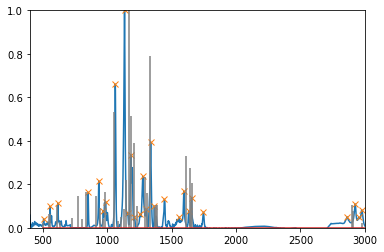

Error calculation:
(222.56010000000003, 851.4601, 628.9)
error >  200.0 , skipping the predicted peak
error >  200.0 , skipping the experimental peak
End of theoretical spectrum

 25 peaks were assigned. Scaling factor of 0.95 was used for the theoretical spectrum.



,Exp. waveno.,Scaled theo. waveno.,Exp. peak height,Theo. peak height,Deviations
0,505.28,496.85,0.04,0.02,8.43
1,555.43,551.95,0.10,0.06,3.48
2,615.21,606.10,0.11,0.10,9.11
3,851.46,833.15,0.16,0.16,18.31
4,933.42,941.45,0.22,0.09,-8.03
5,968.14,964.25,0.08,0.04,3.89
6,986.46,981.35,0.12,0.17,5.11
7,1061.67,1053.55,0.66,0.53,8.12
8,1133.99,1141.90,1.00,0.22,-7.90
9,1158.10,1182.75,0.07,0.52,-24.65



 Mean absolute error: 

MAE = 22.27 cm-1
22.269644 25
pbe0-d3
Theoretical peaks detected of min. height of 0.04, vertical threshold 0.0 and 16-point distance between neighbors are: 
[313.5, 443.65, 520.6, 536.75, 549.1, 591.85, 675.4499999999999, 754.3, 768.55, 831.25, 853.0999999999999, 867.3499999999999, 894.9, 907.25, 919.5999999999999, 929.0999999999999, 975.65, 1010.8, 1021.25, 1049.75, 1064.95, 1085.85, 1144.75, 1168.5, 1181.8, 1204.6, 1218.85, 1230.25, 1238.8, 1259.7, 1275.85, 1318.6, 1330.95, 1343.3, 1375.6, 1396.5, 1413.6, 1454.45, 1513.35, 1527.6, 1584.6, 1605.5, 1632.1, 2907.95, 2923.1499999999996, 3000.1, 3042.85, 3067.5499999999997, 3071.35, 3086.5499999999997]


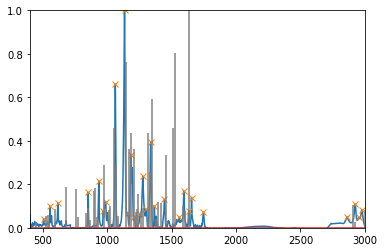

Error calculation:
error >  200.0 , skipping the experimental peak
error >  200.0 , skipping the experimental peak
error >  200.0 , skipping the experimental peak

 24 peaks were assigned. Scaling factor of 0.95 was used for the theoretical spectrum.



,Exp. waveno.,Scaled theo. waveno.,Exp. peak height,Theo. peak height,Deviations
0,505.28,520.60,0.04,0.05,-15.32
1,555.43,549.10,0.10,0.02,6.33
2,615.21,591.85,0.11,0.09,23.36
3,851.46,853.10,0.16,0.09,-1.64
4,933.42,929.10,0.22,0.04,4.32
5,968.14,975.65,0.08,0.29,-7.51
6,986.46,1010.80,0.12,0.08,-24.34
7,1061.67,1064.95,0.66,0.29,-3.28
8,1133.99,1144.75,1.00,0.76,-10.76
9,1158.10,1168.50,0.07,0.36,-10.40



 Mean absolute error: 

MAE = 15.0 cm-1
14.997379166666649 24
b3lyp
Theoretical peaks detected of min. height of 0.04, vertical threshold 0.0 and 16-point distance between neighbors are: 
[421.001, 497.721, 540.876, 549.507, 580.1949999999999, 600.334, 610.8829999999999, 658.833, 724.045, 767.1999999999999, 780.626, 800.765, 824.74, 909.132, 940.779, 953.246, 971.467, 1005.0319999999999, 1043.392, 1068.326, 1085.588, 1101.8909999999998, 1126.825, 1141.21, 1163.267, 1172.857, 1179.57, 1223.684, 1271.634, 1306.158, 1328.215, 1338.764, 1384.796, 1398.222, 1590.022, 1629.341, 1646.6029999999998, 2902.893, 2921.114, 2968.105, 3005.506, 3011.2599999999998, 3057.292]


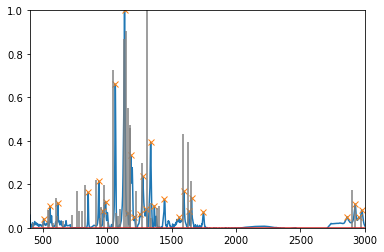

Error calculation:
error >  200.0 , skipping the experimental peak
error >  200.0 , skipping the experimental peak

 25 peaks were assigned. Scaling factor of 0.959 was used for the theoretical spectrum.



,Exp. waveno.,Scaled theo. waveno.,Exp. peak height,Theo. peak height,Deviations
0,505.28,497.72,0.04,0.03,7.56
1,555.43,549.51,0.10,0.08,5.92
2,615.21,610.88,0.11,0.05,4.33
3,851.46,824.74,0.16,0.20,26.72
4,933.42,940.78,0.22,0.05,-7.36
5,968.14,971.47,0.08,0.20,-3.33
6,986.46,1005.03,0.12,0.03,-18.57
7,1061.67,1068.33,0.66,0.07,-6.65
8,1133.99,1126.83,1.00,0.87,7.17
9,1158.10,1163.27,0.07,0.55,-5.16



 Mean absolute error: 

MAE = 16.79 cm-1
16.789475999999965 25
b3lyp-d3
Theoretical peaks detected of min. height of 0.04, vertical threshold 0.0 and 16-point distance between neighbors are: 
[423.878, 498.68, 540.876, 551.425, 584.031, 601.293, 612.8009999999999, 662.669, 725.963, 769.1179999999999, 781.5849999999999, 802.683, 831.453, 914.886, 946.533, 956.1229999999999, 973.385, 1005.991, 1045.31, 1071.203, 1089.424, 1099.973, 1127.7839999999999, 1144.087, 1166.144, 1176.693, 1226.561, 1245.741, 1273.552, 1309.0349999999999, 1333.01, 1384.796, 1398.222, 1403.9759999999999, 1596.735, 1632.2179999999998, 1643.7259999999999, 1651.398, 2900.016, 2918.237, 2967.1459999999997, 3005.506, 3011.2599999999998, 3058.2509999999997]


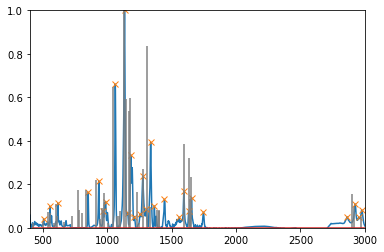

Error calculation:
error >  200.0 , skipping the experimental peak

 26 peaks were assigned. Scaling factor of 0.959 was used for the theoretical spectrum.



,Exp. waveno.,Scaled theo. waveno.,Exp. peak height,Theo. peak height,Deviations
0,505.28,498.68,0.04,0.03,6.60
1,555.43,551.42,0.10,0.07,4.00
2,615.21,612.80,0.11,0.05,2.41
3,851.46,831.45,0.16,0.17,20.01
4,933.42,946.53,0.22,0.04,-13.11
5,968.14,973.38,0.08,0.16,-5.25
6,986.46,1005.99,0.12,0.02,-19.53
7,1061.67,1099.97,0.66,0.08,-38.30
8,1133.99,1127.78,1.00,1.00,6.21
9,1158.10,1166.14,0.07,0.54,-8.04



 Mean absolute error: 

MAE = 15.39 cm-1
15.390842307692274 26
cam-b3lyp
Theoretical peaks detected of min. height of 0.04, vertical threshold 0.0 and 16-point distance between neighbors are: 
[501.17699999999996, 545.874, 556.3349999999999, 607.689, 619.101, 625.7579999999999, 732.27, 776.967, 791.232, 809.3009999999999, 835.929, 917.7149999999999, 950.049, 971.9219999999999, 989.04, 1009.011, 1059.414, 1086.042, 1114.572, 1146.906, 1172.5829999999999, 1183.995, 1188.75, 1211.5739999999998, 1243.908, 1303.821, 1340.9099999999999, 1381.8029999999999, 1394.166, 1635.72, 1661.397, 1670.907, 1685.172, 2907.207, 2918.6189999999997, 2978.5319999999997, 3009.915]


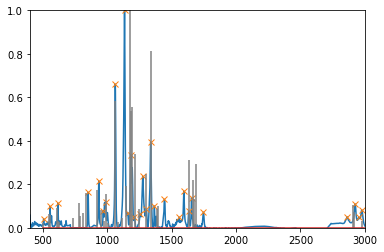

Error calculation:
(225.7021000000001, 851.4601, 625.7579999999999)
error >  200.0 , skipping the predicted peak
error >  200.0 , skipping the experimental peak
error >  200.0 , skipping the experimental peak
End of theoretical spectrum

 24 peaks were assigned. Scaling factor of 0.951 was used for the theoretical spectrum.



,Exp. waveno.,Scaled theo. waveno.,Exp. peak height,Theo. peak height,Deviations
0,505.28,501.18,0.04,0.02,4.11
1,555.43,556.33,0.10,0.06,-0.91
2,615.21,619.10,0.11,0.03,-3.89
3,851.46,835.93,0.16,0.16,15.53
4,933.42,917.71,0.22,0.17,15.71
5,968.14,971.92,0.08,0.03,-3.78
6,986.46,989.04,0.12,0.16,-2.58
7,1061.67,1059.41,0.66,0.58,2.26
8,1133.99,1146.91,1.00,0.19,-12.91
9,1158.10,1183.99,0.07,0.54,-25.89



 Mean absolute error: 

MAE = 31.11 cm-1
31.107487499999962 24
cam-b3lyp-d3
Theoretical peaks detected of min. height of 0.04, vertical threshold 0.0 and 16-point distance between neighbors are: 
[501.17699999999996, 545.874, 558.237, 608.64, 620.052, 627.66, 733.221, 777.918, 793.134, 810.252, 839.733, 922.4699999999999, 952.9019999999999, 974.775, 989.991, 1009.011, 1061.316, 1086.993, 1117.425, 1138.347, 1149.759, 1173.5339999999999, 1185.897, 1191.6029999999998, 1210.623, 1246.761, 1305.723, 1341.8609999999999, 1381.8029999999999, 1395.117, 1639.524, 1663.299, 1673.76, 1688.9759999999999, 2905.305, 2917.6679999999997, 2978.5319999999997, 3008.964]


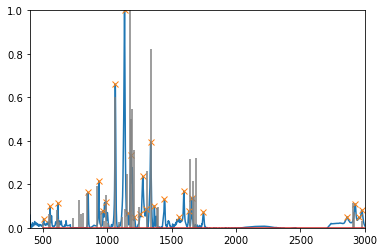

Error calculation:
(223.80010000000004, 851.4601, 627.66)
error >  200.0 , skipping the predicted peak
error >  200.0 , skipping the experimental peak
error >  200.0 , skipping the experimental peak
End of theoretical spectrum

 24 peaks were assigned. Scaling factor of 0.951 was used for the theoretical spectrum.



,Exp. waveno.,Scaled theo. waveno.,Exp. peak height,Theo. peak height,Deviations
0,505.28,501.18,0.04,0.02,4.11
1,555.43,558.24,0.10,0.06,-2.81
2,615.21,620.05,0.11,0.04,-4.84
3,851.46,839.73,0.16,0.16,11.73
4,933.42,922.47,0.22,0.19,10.95
5,968.14,974.77,0.08,0.03,-6.64
6,986.46,989.99,0.12,0.15,-3.53
7,1061.67,1061.32,0.66,0.60,0.36
8,1133.99,1149.76,1.00,0.25,-15.76
9,1158.10,1185.90,0.07,0.50,-27.79



 Mean absolute error: 

MAE = 31.74 cm-1
31.741487499999966 24
m06l
Theoretical peaks detected of min. height of 0.04, vertical threshold 0.0 and 16-point distance between neighbors are: 
[421.293, 493.56899999999996, 536.3639999999999, 546.8249999999999, 598.179, 621.0029999999999, 656.1899999999999, 720.858, 756.045, 767.457, 795.036, 822.615, 900.597, 933.882, 970.971, 988.0889999999999, 1042.296, 1075.581, 1080.336, 1098.405, 1115.523, 1138.347, 1150.71, 1164.024, 1170.681, 1226.79, 1274.34, 1296.213, 1305.723, 1318.086, 1360.8809999999999, 1372.293, 1375.146, 1596.7289999999998, 1635.72, 1652.838, 2897.6969999999997, 2988.042, 3013.719, 3018.4739999999997, 3026.082, 3034.641]


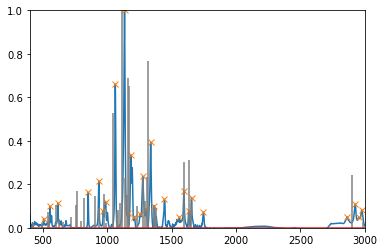

Error calculation:
error >  200.0 , skipping the experimental peak
error >  200.0 , skipping the experimental peak

 25 peaks were assigned. Scaling factor of 0.951 was used for the theoretical spectrum.



,Exp. waveno.,Scaled theo. waveno.,Exp. peak height,Theo. peak height,Deviations
0,505.28,493.57,0.04,0.02,11.71
1,555.43,546.82,0.10,0.06,8.60
2,615.21,621.00,0.11,0.04,-5.79
3,851.46,822.62,0.16,0.14,28.85
4,933.42,933.88,0.22,0.09,-0.46
5,968.14,970.97,0.08,0.16,-2.83
6,986.46,988.09,0.12,0.02,-1.63
7,1061.67,1075.58,0.66,0.07,-13.91
8,1133.99,1138.35,1.00,0.23,-4.35
9,1158.10,1164.02,0.07,0.69,-5.92



 Mean absolute error: 

MAE = 21.93 cm-1
21.930691999999944 25
wb97-xd
Theoretical peaks detected of min. height of 0.04, vertical threshold 0.0 and 16-point distance between neighbors are: 
[498.75, 546.25, 554.8, 606.1, 617.5, 626.05, 630.8, 730.55, 773.3, 782.8, 804.65, 836.0, 916.75, 946.1999999999999, 957.5999999999999, 970.9, 982.3, 1005.0999999999999, 1052.6, 1082.05, 1109.6, 1129.55, 1142.85, 1165.6499999999999, 1178.95, 1184.6499999999999, 1201.75, 1237.85, 1292.0, 1331.8999999999999, 1380.35, 1394.6, 1634.0, 1658.6999999999998, 1668.1999999999998, 1680.55, 2905.1, 2913.65, 2988.7, 3014.35]


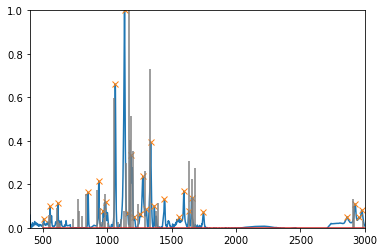

Error calculation:
(225.41010000000006, 851.4601, 626.05)
error >  200.0 , skipping the predicted peak
error >  200.0 , skipping the experimental peak
error >  200.0 , skipping the experimental peak
End of theoretical spectrum

 24 peaks were assigned. Scaling factor of 0.95 was used for the theoretical spectrum.



,Exp. waveno.,Scaled theo. waveno.,Exp. peak height,Theo. peak height,Deviations
0,505.28,498.75,0.04,0.02,6.53
1,555.43,554.80,0.10,0.06,0.63
2,615.21,617.50,0.11,0.03,-2.29
3,851.46,836.00,0.16,0.16,15.46
4,933.42,946.20,0.22,0.09,-12.78
5,968.14,970.90,0.08,0.04,-2.76
6,986.46,982.30,0.12,0.15,4.16
7,1061.67,1052.60,0.66,0.60,9.07
8,1133.99,1142.85,1.00,0.30,-8.86
9,1158.10,1178.95,0.07,0.40,-20.85



 Mean absolute error: 

MAE = 30.45 cm-1
30.45009583333329 24
Calculated MAEs for each functional:


,MAE,No. of assigned peaks
pbe0,22.27,25
pbe0-d3,15.00,24
b3lyp,16.79,25
b3lyp-d3,15.39,26
cam-b3lyp,31.11,24
cam-b3lyp-d3,31.74,24
m06l,21.93,25
wb97-xd,30.45,24


In [215]:
#For selected functionals read the spectra and calculate the MAEs
MAEs={}
peaks_assigned={}
for funs in functional:
    print(funs)
    theo_spec=read_theo(molecule,form,funs) 
    SF=scaling_f[funs]
    
    wavenumbers_theo=SF*theo_spec[:,0]
    heights_theo=theo_spec[:,1]/max(theo_spec[:,1])
    
    peaks_theo=theo_peaks(SF,wavenumbers_theo,heights_theo)
    
    y_theo=[wavenumbers_theo[j] for j in peaks_theo]
    print("Theoretical peaks detected of min. height of {}, vertical threshold {} and {}-point distance between neighbors are: ".format(H,T,D))
    print(y_theo)
    h_theo=[heights_theo[j] for j in peaks_theo]
    #print(h_theo)
    no_of_peaks=len(y_theo)
    
    #draw the spectra comparison
    plt.plot(wavenumbers,heights)
    plt.ylim(ymin=0,ymax=1)
    plt.xlim(xmin=400,xmax=4000)
    plt.plot(y,heights[peaks],"x")
#fig, ax = plt.subplots()
    plt.stem(y_theo, heights_theo[peaks_theo],markerfmt=' ',linefmt='grey')
#plt.stem(y_theo,heights[peaks_theo] ,markerfmt=' ',linefmt='grey')
    plt.ylim(ymin=0,ymax=1)
    plt.xlim(xmin=400,xmax=3000)
    plt.show()
    m,n=calculate_MAE()
    MAEs[funs]=m
    peaks_assigned[funs]=n
    print(m,n)
    
pd.set_option('display.precision', 2)
print("Calculated MAEs for each functional:")
df=pd.DataFrame.from_dict(MAEs,orient='index',columns=['MAE'])
df['No. of assigned peaks']=peaks_assigned.values()

display(df)
#for funs in functional:
#    print(funs,MAEs[funs],peaks_assigned[funs])
    